<a href="https://colab.research.google.com/github/25stu7619/matplotlib_practice/blob/main/face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이미지 URL (Enter = 샘플): https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQhOjm1S6UfcX3hhCqpOvOIaBmoC2iiR-MbwdbocpBfuS9u--zmg_jSD9NgnlmO9JCRISRyG6PLTTRsquZ_KnwKASuhWEJRXlyvhzdsSG0
검출된 얼굴: 1명


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

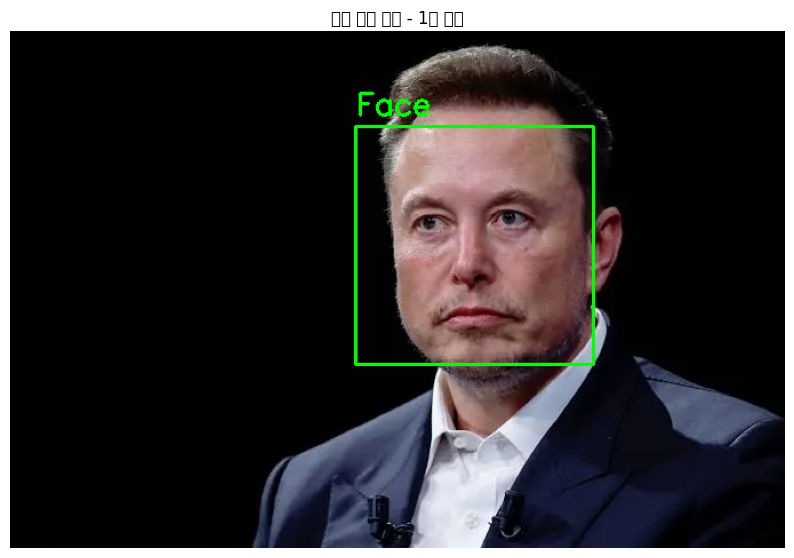

In [1]:
# 간단한 얼굴 인식 코드 (30줄)
# Google Colab에서 실행

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# 이미지 다운로드
def load_image(url):
    response = requests.get(url)
    img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    return cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# 얼굴 검출 및 표시
def detect_faces(img):
    # Haar Cascade 로드
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 그레이스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, 1.1, 5, minSize=(30, 30))

    # 얼굴 영역 표시
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return img, len(faces)

# 메인 실행
url = input("이미지 URL (Enter = 샘플): ") or "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?w=400"
img = load_image(url)
result, count = detect_faces(img)

print(f"검출된 얼굴: {count}명")
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'얼굴 검출 결과 - {count}명 발견')
plt.axis('off')
plt.show()